In [58]:
import pandas as pd
import numpy as np
%matplotlib inline

In [59]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
print(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [61]:
feature_cols=['age','sex','bmi','children','smoker','region']
X= data[feature_cols]
Y= data['charges']

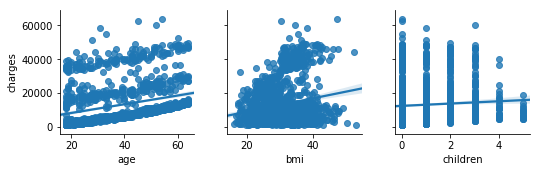

In [62]:
import seaborn as sns
sns.pairplot(data,x_vars=['age','bmi','children'],y_vars="charges",kind='reg')

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


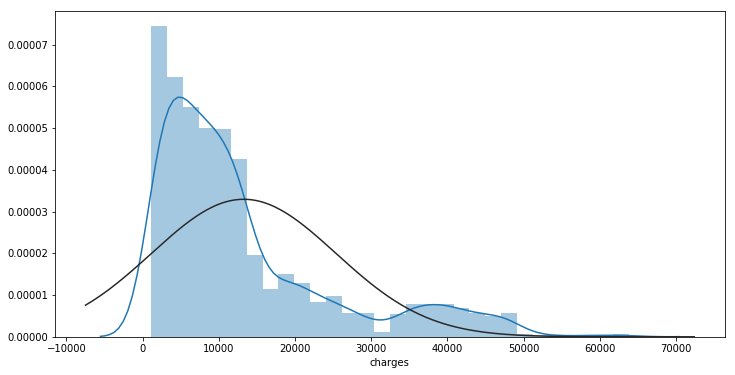

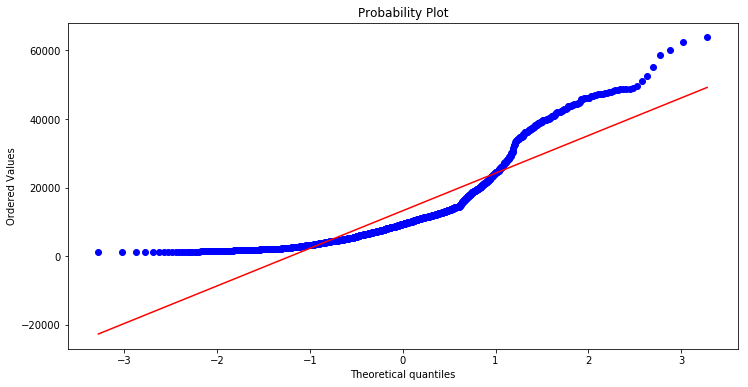

In [63]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
plt.figure(figsize=(12,6))
sns.distplot(data['charges'], fit=norm)
fig = plt.figure(figsize=(12,6))
res = stats.probplot(data['charges'], plot=plt)

In [64]:
print("Skewness: {}".format(data['charges'].skew()))

Skewness: 1.5158796580240388


C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


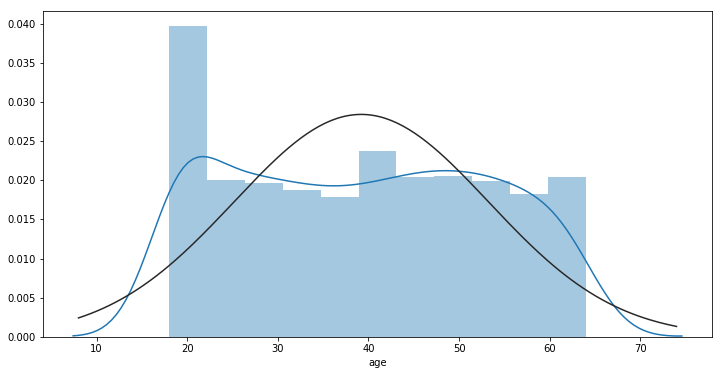

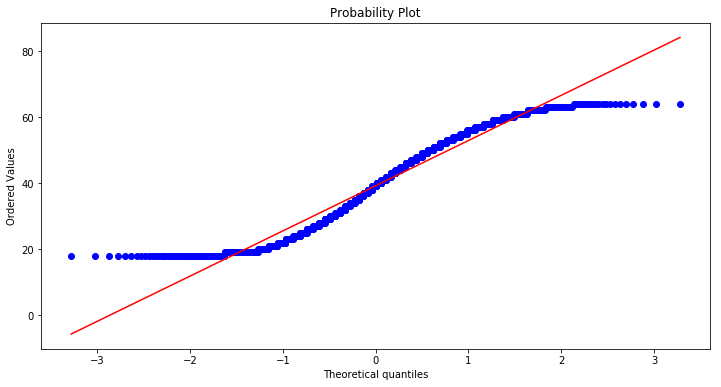

In [65]:
plt.figure(figsize=(12,6))
sns.distplot(data['age'], fit=norm)
fig = plt.figure(figsize=(12,6))
res = stats.probplot(data['age'], plot=plt)

In [66]:
print("Skewness: {}".format(data['age'].skew()))

Skewness: 0.05567251565299186


C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


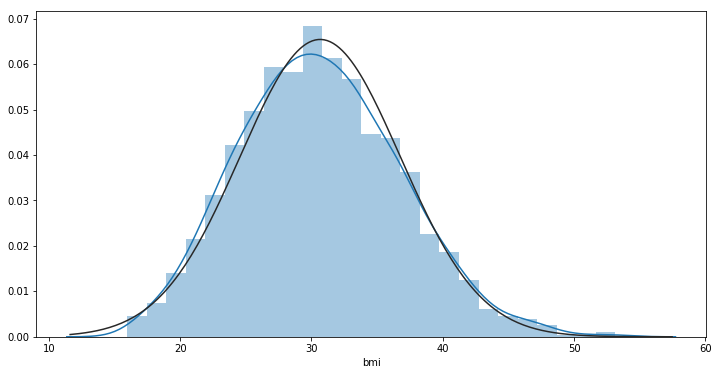

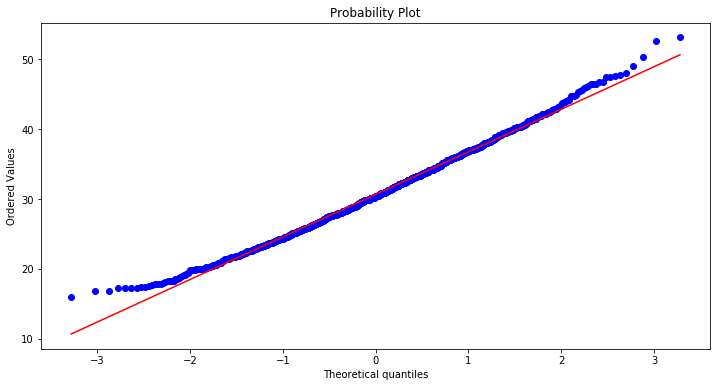

In [67]:
plt.figure(figsize=(12,6))
sns.distplot(data['bmi'], fit=norm)
fig = plt.figure(figsize=(12,6))
res = stats.probplot(data['bmi'], plot=plt)

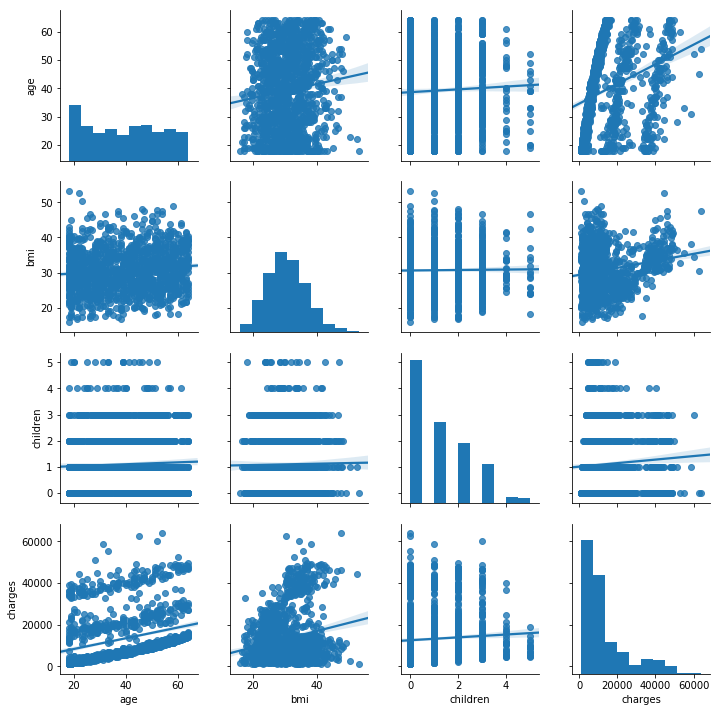

In [68]:
sns.pairplot(data, kind='reg')

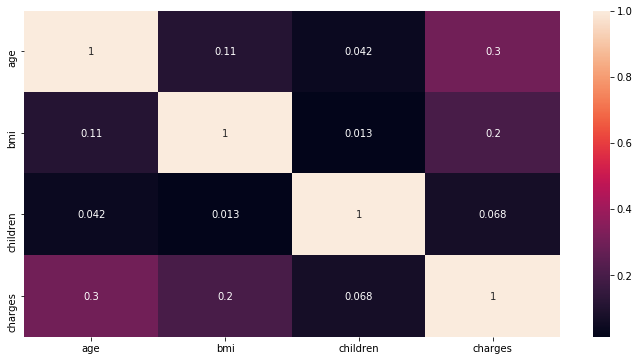

In [69]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True)

In [70]:
print(data.select_dtypes(include=['object']).columns.values)

['sex' 'smoker' 'region']


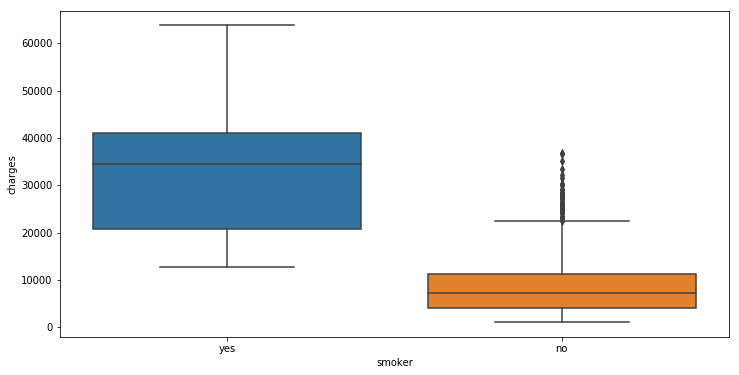

In [71]:
plt.figure(figsize=(12,6))
sns.boxplot(x='smoker', y = 'charges', data = data)

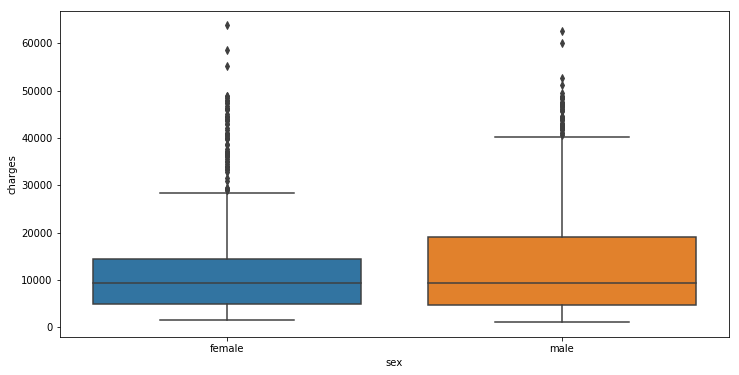

In [72]:
plt.figure(figsize=(12,6))
sns.boxplot(x='sex', y = 'charges', data = data)

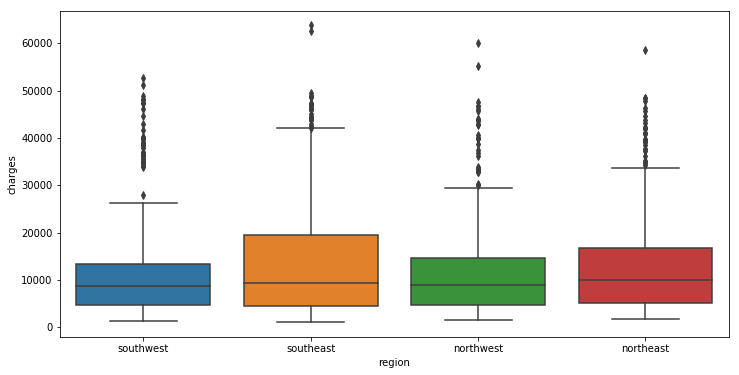

In [73]:
plt.figure(figsize=(12,6))
sns.boxplot(x='region', y = 'charges', data = data)

In [74]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [75]:
catColumns = ['sex', 'smoker', 'region']
data_dum = pd.get_dummies(data, columns = catColumns, drop_first=True)
data_dum.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


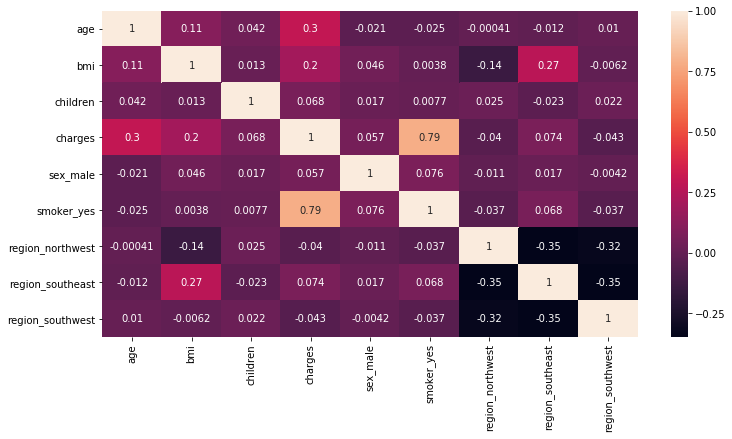

In [76]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(data_dum.corr(), annot=True)

In [77]:
X = data_dum[['age', 'bmi', 'smoker_yes']]
y = data_dum['charges']

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
y_log_train = np.log1p(y_train)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


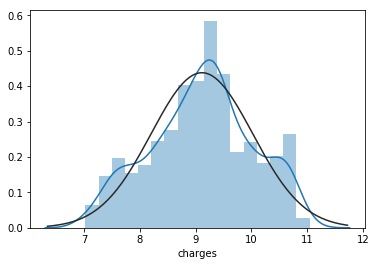

In [81]:
sns.distplot(y_log_train, fit=norm)

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
coeff_df = pd.DataFrame(lm1.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,259.410205
bmi,326.450232
smoker_yes,23675.371847


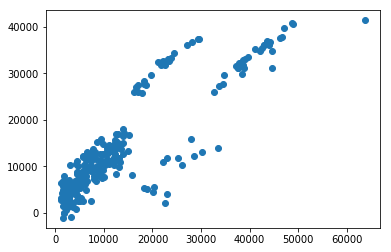

In [85]:
y_pred1 = lm1.predict(X_test)
plt.scatter(y_test, y_pred1)

In [86]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2score=r2_score(y_test,y_pred1)
print(r2score)
rmse=np.sqrt(mean_squared_error(y_test,y_pred1))
print(rmse)

0.7776932310583374
5874.763304187489


In [87]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 4260.560091099392
MSE: 34512843.8802279
RMSE 5874.763304187489


C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


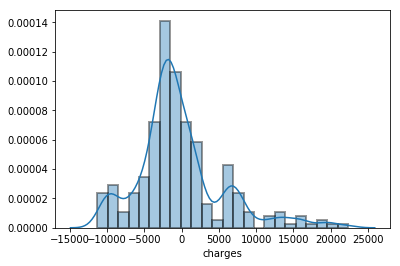

In [88]:
sns.distplot((y_test-y_pred1), hist_kws=dict(edgecolor="k", linewidth=2))

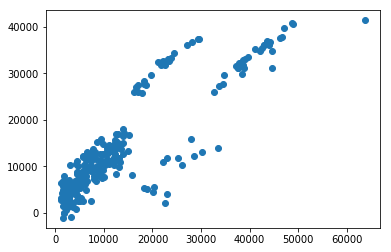

In [44]:
plt.scatter(y_test, y_pred1)

In [89]:
lm2 = LinearRegression()
lm2.fit(X_train,y_log_train)
coeff_df = pd.DataFrame(lm2.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,0.034826
bmi,0.011152
smoker_yes,1.548412


In [45]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 4260.560091099392
MSE: 34512843.8802279
RMSE 5874.763304187489


In [90]:
y_pred2 = lm2.predict(X_test)
y_pred2 = np.expm1(y_pred2)

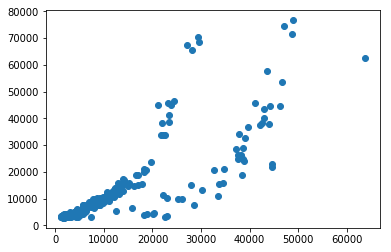

In [91]:
plt.scatter(y_test, y_pred2)

In [49]:
lm2.fit(X_train,y_log_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
 from sklearn import metrics
 print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
 print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
 print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 4214.797488964256
MSE: 73191057.27337055
RMSE 8555.177220453737


C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


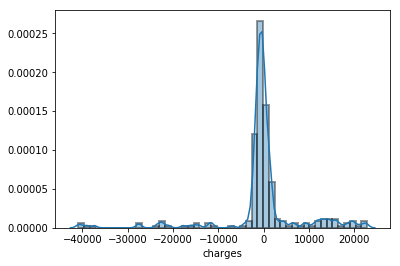

In [93]:
 sns.distplot((y_test-y_pred2), hist_kws=dict(edgecolor="k", linewidth=2))

In [94]:
def calc_insurance(age, bmi, smoking):
    y = ((age*lm1.coef_[0]) + (bmi*lm1.coef_[1]) + (smoking*lm1.coef_[2]) + lm1.intercept_)
    return y

In [95]:
print(calc_insurance(36, 24, 0))

5465.770603517141
